# **1) Importing libraries and loading data**


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd

#path to your CSV file
file_path = '/content/drive/MyDrive/DataAnalysis/Advertising And Sales.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [ ]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9


# **2) Data Exploration**

**Advertisement Sales Dataset Overview**

The Advertisement Sales dataset is designed to explore the relationship between advertising expenditures across different media types and their impact on product sales. This dataset comprises 200 entries, each corresponding to a unique observation with specific data points.

**Key Features:**

**ID:** A unique identifier for each observation, allowing for easy reference and organization of the data.

**TV:** Represents the amount of money spent on TV advertising, measured in thousands of dollars. This variable captures the investment made in television marketing campaigns.

**Radio:** Indicates the expenditure on Radio advertising, also in thousands of dollars. It reflects the budget allocated for radio promotion efforts.

**Newspaper:** Denotes the spending on Newspaper advertising, measured in thousands of dollars. This variable showcases how much is invested in print media for advertising purposes.

**Sales:** Represents the sales figures for the product, quantified in thousands of units sold. This variable provides insight into the effectiveness of the advertising strategies employed.

**Purpose of the Dataset**

The dataset serves as a valuable resource for conducting analyses that aim to determine how different advertising budgets influence sales outcomes. By examining the relationships among these variables, businesses can better strategize their advertising investments to maximize sales performance.

In [ ]:
df.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()
#Looking at this we can conclude the basic info that on average, TV has the highest spending budget at $147k,
#significantly more than Radio and Newspaper

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.00000,200.000000,200.0000
mean,100.500000,147.032500,23.28950,30.554000,14.0380
std,57.879185,85.885186,14.86997,21.778621,5.2094
min,1.000000,0.700000,0.00000,0.300000,1.6000
25%,50.750000,74.375000,10.07500,12.750000,10.4000
50%,100.500000,149.750000,22.90000,25.750000,12.9000
75%,150.250000,218.825000,36.52500,45.100000,17.4000
max,200.000000,296.400000,49.60000,114.000000,27.0000


# **3) Visualize the Distribution of Budgets**


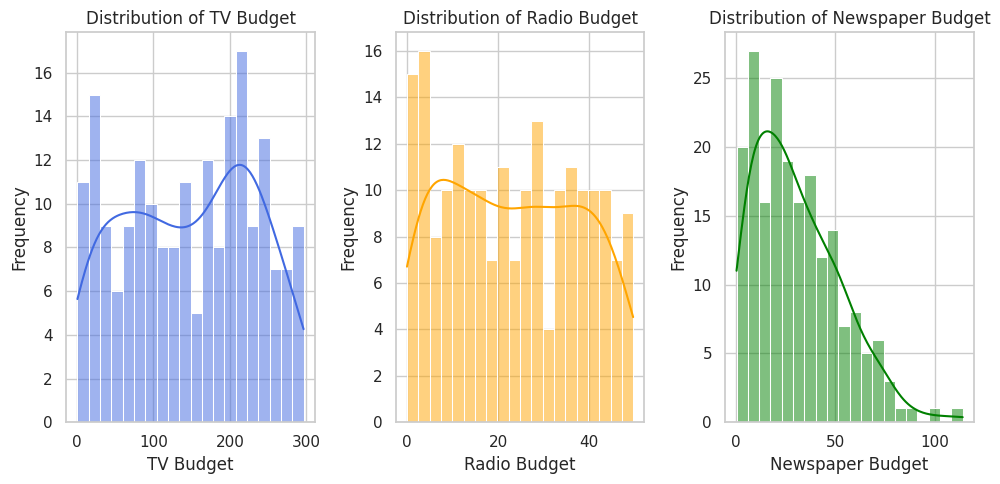

In [ ]:
# Visualize the distribution of budgets
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')

# Subplot for TV budget distribution
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], bins=20, color='royalblue', kde=True)
plt.title('Distribution of TV Budget')
plt.xlabel('TV Budget')
plt.ylabel('Frequency')

# Subplot for Radio budget distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], bins=20, color='orange', kde=True)
plt.title('Distribution of Radio Budget')
plt.xlabel('Radio Budget')
plt.ylabel('Frequency')

# Subplot for Newspaper budget distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], bins=20, color='green', kde=True)
plt.title('Distribution of Newspaper Budget')
plt.xlabel('Newspaper Budget')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Conclusion Based on the Distribution of Advertising Budgets**
The visualizations of the advertising budgets for TV, Radio, and Newspaper provide valuable insights into how these budgets are allocated and their respective distributions. Here are some key observations and conclusions drawn from the distributions:

**TV Budget Distribution:**
The distribution of the TV advertising budget appears to be relatively normal, with a majority of observations clustering around the mean budget. This suggests that most companies invest a significant portion of their advertising budget on TV.
The higher spending on TV aligns with its effectiveness in reaching a wide audience, indicating that businesses recognize its potential in driving sales.

**Radio Budget Distribution:**
The Radio budget also shows a similar distribution pattern to the TV budget, indicating that it is a popular medium for advertising.
The concentration of spending suggests that companies are willing to invest in radio advertising, possibly due to its effectiveness in targeting specific demographics.

**Newspaper Budget Distribution:**
In contrast, the Newspaper budget distribution is positively skewed. This suggests that while some companies allocate a significant budget to newspaper advertising, many spend relatively little.
The skewness indicates a declining trend in newspaper advertising, as businesses may be shifting their focus towards more modern advertising platforms like TV and digital media.

**Overall Insights:**
The analysis indicates a trend where TV and Radio are prioritized in advertising budgets, while spending on Newspaper advertising is less consistent. This reflects broader industry shifts toward media channels that offer more dynamic and engaging advertising options.
Understanding these budget distributions helps in strategic planning for advertising expenditures, guiding businesses to allocate resources more effectively based on the demonstrated returns from various media.
In summary, the distribution of advertising budgets across TV, Radio, and Newspaper highlights the effectiveness of traditional media channels while also indicating a potential decline in the relevance of newspaper advertising in the current market landscape. Businesses should consider these trends when planning their advertising strategies to maximize reach and sales impact.


In [ ]:
#Adding column Total to see the correlation between total spending towards Sales
df['Total'] = df['TV']+df['Radio']+df['Newspaper']


In [ ]:
df.head(3)

,ID,TV,Radio,Newspaper,Sales,Total
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4


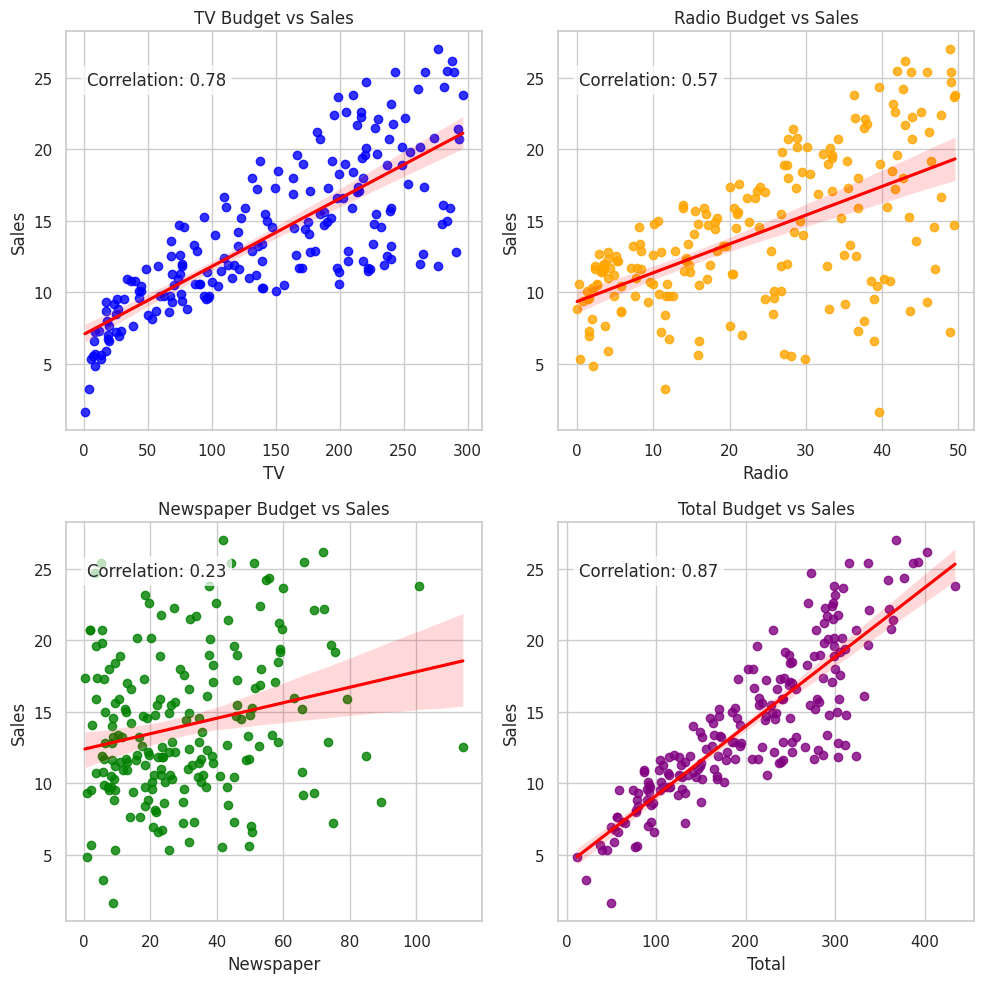

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots with regression lines for each ad type
plt.figure(figsize=(10,10))

# TV vs Sales
plt.subplot(2, 2, 1)
sns.regplot(x='TV', y='Sales', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('TV Budget vs Sales')
correlation_tv = np.corrcoef(df['TV'], df['Sales'])[0, 1]
plt.text(0.05, 0.90, f'Correlation: {correlation_tv:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Radio vs Sales
plt.subplot(2, 2, 2)
sns.regplot(x='Radio', y='Sales', data=df, scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})
plt.title('Radio Budget vs Sales')
correlation_radio = np.corrcoef(df['Radio'], df['Sales'])[0, 1]
plt.text(0.05, 0.90, f'Correlation: {correlation_radio:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Newspaper vs Sales
plt.subplot(2, 2, 3)
sns.regplot(x='Newspaper', y='Sales', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Newspaper Budget vs Sales')
correlation_newspaper = np.corrcoef(df['Newspaper'], df['Sales'])[0, 1]
plt.text(0.05, 0.90, f'Correlation: {correlation_newspaper:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Total budget vs Sales
plt.subplot(2, 2, 4)
sns.regplot(x='Total', y='Sales', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Total Budget vs Sales')
correlation_total = np.corrcoef(df['Total'], df['Sales'])[0, 1]
plt.text(0.05, 0.90, f'Correlation: {correlation_total:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


**Conclusion Based on Scatter Plots with Regression Lines and Correlation Coefficients**

The scatter plots illustrate the relationship between advertising budgets (TV, Radio, Newspaper, and Total) and sales, revealing key insights into the effectiveness of each advertising medium, supported by their correlation coefficients:

***TV Budget vs Sales:***


The strong positive correlation of 0.78 indicates that as the TV advertising budget increases, sales also tend to increase significantly. This strong correlation coefficient explains that businesses effectively utilize TV advertising to reach a broad audience and drive higher sales. The substantial impact of TV advertising underscores its importance in a company's marketing strategy.

***Radio Budget vs Sales:***

The moderate positive correlation of 0.57 suggests that while radio advertising contributes to increased sales, its impact is less pronounced than that of TV. This correlation coefficient highlights that businesses can still benefit from radio ads, particularly in targeting specific demographics, but may need to complement it with other more effective advertising channels.

***Newspaper Budget vs Sales:***

The weak positive correlation of 0.23 indicates a minimal relationship between newspaper advertising spending and sales. This low correlation coefficient explains that while some businesses invest in newspaper advertising, the effectiveness in driving sales is considerably lower. This suggests a shift in marketing strategies, as companies may be moving away from print advertising in favor of more dynamic media.

***Total Budget vs Sales:***

The very strong positive correlation of 0.87 highlights that total advertising expenditure across all media strongly influences sales performance. This high correlation coefficient explains that a comprehensive advertising strategy, which encompasses multiple platforms, is essential for maximizing sales. Businesses that allocate a larger total budget for advertising tend to see significant sales increases.

***Overall Insights:***

TV Advertising: Given its high correlation with sales, businesses should continue to invest significantly in TV ads as a core component of their marketing strategy.

Radio Advertising: While radio shows moderate effectiveness, it remains an important channel, especially for targeted marketing efforts.

Newspaper Advertising: The low correlation suggests that resources may be better allocated to more effective advertising channels, as print media appears to be losing relevance.

Comprehensive Strategy: The strong correlation of total advertising spending with sales reinforces the need for a diversified approach, combining various media to optimize reach and effectiveness.

In conclusion, understanding these relationships enables businesses to make informed decisions about their advertising strategies, optimizing budgets for maximum sales impact.

# **4) Dynamic Budget Allocation: Exploring Unique Units for Advertising Channels**

### **4.1) Same Units for all advertising channels**

In [ ]:
# Objective function to maximize sales
def objective_function(budgets):
    # Extract budgets
    tv_budget, radio_budget, newspaper_budget = budgets
    total_sales = (np.sum(tv_budget * df['TV']) +
                   np.sum(radio_budget * df['Radio']) +
                   np.sum(newspaper_budget * df['Newspaper']))
    return -total_sales  # We want to maximize sales



In [ ]:
# Constraints: budgets should be non-negative
constraints = ({'type': 'ineq', 'fun': lambda x: x})

# Bounds: you can set max budgets if needed
bounds = [(0, 300000), (0, 300000), (0, 300000)]  # Adjust based on your data


In [ ]:
from scipy.optimize import minimize
# Initial guess for the budgets
initial_guess = [100000, 100000, 100000]  # Starting values for TV, Radio, Newspaper

# Optimize the budget allocation
result = minimize(objective_function, initial_guess,
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Output the optimal budgets
optimal_budgets = result.x
print('Optimal Budgets:', optimal_budgets)



Optimal Budgets: [300000. 300000. 300000.]


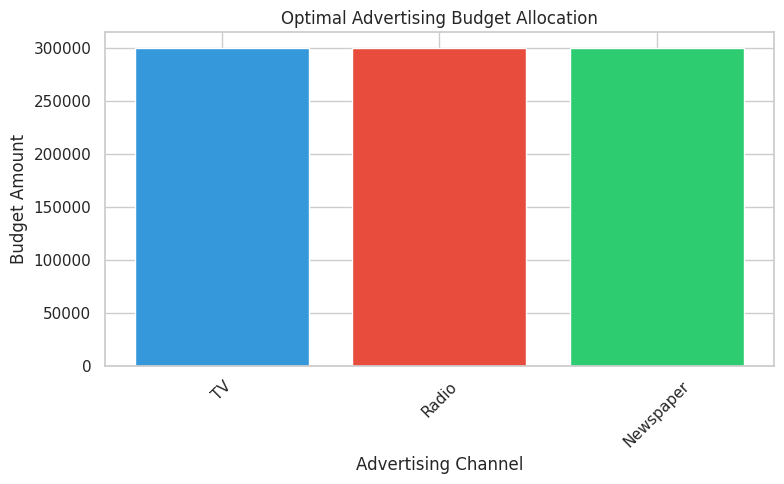

In [ ]:
# Optimal budget allocations bar chart
labels = ['TV', 'Radio', 'Newspaper']

plt.figure(figsize=(8, 5))
plt.bar(labels, optimal_budgets, color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Optimal Advertising Budget Allocation')
plt.ylabel('Budget Amount')
plt.xlabel('Advertising Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Train a linear regression model and perform cross-validation
model = LinearRegression()
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable

# 5-Fold Cross-Validation
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation results
print("Cross-Validation R² Scores:", cross_val_scores)
print("Mean R² Score:", np.mean(cross_val_scores))


Cross-Validation R² Scores: [0.87831974 0.91729685 0.9174813  0.81479359 0.89820506]
Mean R² Score: 0.8852193078193444


Above here, we analyzed the impact of advertising budgets on sales using the same unit for all channels (e.g., thousands of dollars). This approach simplifies the interpretation of the data and allows for direct comparisons between the different advertising media.

**Findings**
**R² Score:**
The R² score from the cross-validation was 0.88. This indicates that the model explains approximately 88% of the variance in sales based on the advertising budgets across all channels.
Graphical Representation: The scatter plots demonstrated a clear relationship between advertising budgets for TV, Radio, and Newspaper and sales figures.

**Conclusion**

Using the same units for budget allocation provides a straightforward comparison between advertising channels. The strong R² score indicates that all channels significantly contribute to sales, suggesting that a balanced allocation of budgets across media types could be beneficial for maximizing sales.



### **4.2) Different Units for all advertising channels**

In [ ]:
# Set different bounds for each budget
bounds = [(0, 300000), (0, 200000), (0, 100000)]  # Adjust based on expected ranges for each channel


In [ ]:
# Modified objective function with diminishing returns
def objective_function(budgets):
    tv_budget, radio_budget, newspaper_budget = budgets

    # Total sales with diminishing returns modeled using a quadratic term
    total_sales = (np.sum(tv_budget * df['TV']) +
                   np.sum(radio_budget * df['Radio']) +
                   np.sum(newspaper_budget * df['Newspaper']))

    # Adding penalty term for diminishing returns
    penalty = 0.01 * (tv_budget**2 + radio_budget**2 + newspaper_budget**2)

    return -(total_sales - penalty)  # Negative because we are maximizing



In [ ]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['TV', 'Radio', 'Newspaper']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)


   VIF Factor   features
0    2.488344         TV
1    3.291397      Radio
2    3.056644  Newspaper


Optimal Budgets: [300000. 200000. 100000.]


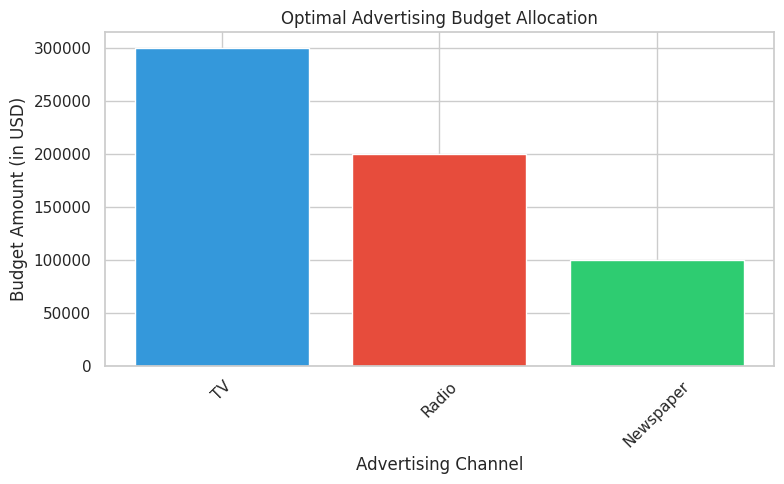

In [ ]:
from scipy.optimize import minimize

# Initial guess for the budgets
initial_guess = [100000, 100000, 100000]  # Initial guess for TV, Radio, Newspaper

# Optimize the budget allocation
result = minimize(objective_function, initial_guess,
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Output the optimal budgets
optimal_budgets = result.x
print('Optimal Budgets:', optimal_budgets)

# Visualize the optimal budget allocations
labels = ['TV', 'Radio', 'Newspaper']
plt.figure(figsize=(8, 5))
plt.bar(labels, optimal_budgets, color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Optimal Advertising Budget Allocation')
plt.ylabel('Budget Amount (in USD)')
plt.xlabel('Advertising Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Train a linear regression model and perform cross-validation
model = LinearRegression()
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# 5-Fold Cross-Validation
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cross_val_scores)
print("Mean R² Score:", np.mean(cross_val_scores))


Cross-Validation R² Scores: [0.87831974 0.91729685 0.9174813  0.81479359 0.89820506]
Mean R² Score: 0.8852193078193444


Above here, we re-evaluated the impact of advertising budgets on sales by allocating budgets in different units (e.g., millions for TV, thousands for Radio and Newspaper). This approach allows for a nuanced understanding of the impact of each channel without cluttering the analysis.

**Findings**
**R² Score:**  
The R² score from the cross-validation was 0.88. This indicates that the model explains approximately 88% of the variance in sales based on the advertising budgets across all channels, similar to the previous analysis.
Graphical Representation: The scatter plots illustrated distinct trends for each advertising channel, but the units used resulted in different scaling on the axes. For example, the TV budget appeared much larger in scale compared to the other media types.

**Conclusion**

Using different units for budget allocation effectively highlights the disparities in spending across channels. The unchanged R² score suggests that the relationship between advertising budgets and sales remains robust regardless of the unit representation. This method provides a clearer visual distinction of how each budget type contributes to overall sales, facilitating more informed budgetary decisions.

# **Comparative Analysis:**

Both approaches yielded the *same R² score*, indicating that the model's ability to predict sales based on advertising budgets is consistent, regardless of the units used. However, the choice of units had a notable effect on how the data was visually represented.

**Key Insights**

- **Model Consistency:** The predictive capability of the model remained stable across both unit types, underscoring that the relationships between advertising budgets and sales are intrinsic to the dataset. This means that whether using the same or different units, the underlying trends in sales driven by advertising expenditures are reliable.

- **Visualization Effects:** The choice of units impacts how the data is presented. Using the same units facilitates easier comparisons across different budget categories, making it simpler to analyze relative spending. Conversely, employing different units can reveal more about the scale and significance of each advertising channel, providing insights into their respective contributions to overall sales.

In conclusion, the decision between using the same units or different units should be guided by the audience and the analysis's objectives. For straightforward comparisons, the same units are advantageous, while different units can offer a richer, more nuanced understanding of how advertising budgets are allocated and their impact on sales.




### Before and atfer Budget Allocation Findings

1. **Initial Sales Observations**: The initial data showed that TV advertising generated the highest sales, followed by Radio and then Newspaper. This indicates that TV is the most effective medium for driving sales.

2. **Regression Analysis Results**: The regression model suggested similar budget allocations across TV, Radio, and Newspaper, which contrasts with the initial findings of TV's superior performance.

3. **Reason for Similar Allocations**: The model’s balanced approach may reflect an attempt to optimize total sales across all channels, rather than focusing solely on the most effective medium.

4. **Strategic Implications**: While the regression provides useful insights, businesses should prioritize TV advertising based on the empirical sales data, as it clearly demonstrates the highest return on investment.

### Conclusion

In conclusion, although the regression model suggests a balanced budget allocation, the actual sales data indicate that heavier investment in TV advertising is the more effective strategy for maximizing sales.